In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

# Load the data
file_path = "hp_obp.csv"
data = pd.read_csv(file_path)

# Calculate correlation with bat speed
correlations = data.corr(numeric_only=True)
bat_speed_corr = correlations['bat_speed_mph'].sort_values(ascending=False)

# Display the correlation with bat speed
print("Variables Correlated with Bat Speed (from highest to lowest):")
print(bat_speed_corr.head(10))

Variables Correlated with Bat Speed (from highest to lowest):
bat_speed_mph                          1.000000
peak_power_[w]_mean_cmj                0.827816
peak_power_[w]_mean_sj                 0.814279
concentric_peak_force_[n]_mean_cmj     0.788537
pitch_speed_mph                        0.781043
eccentric_peak_force_[n]_mean_cmj      0.780344
peak_eccentric_force_[n]_mean_pp       0.745632
body_weight_[lbs]                      0.727700
jump_height_(imp-mom)_[cm]_mean_cmj    0.653825
peak_vertical_force_[n]_max_imtp       0.643338
Name: bat_speed_mph, dtype: float64


In [49]:
# Filter data based on bat speed (greater than 70 or less than 68)
filtered_data = data[(data['bat_speed_mph'] > 70) | (data['bat_speed_mph'] < 68)].dropna(subset=['bat_speed_mph'])

# Calculate correlation with bat speed
correlations = filtered_data.corr(numeric_only=True)
bat_speed_corr = correlations['bat_speed_mph'].sort_values(ascending=False)

# Display the correlation with bat speed
print("Variables Correlated with Bat Speed (from highest to lowest):")
print(bat_speed_corr.head(10))

Variables Correlated with Bat Speed (from highest to lowest):
bat_speed_mph                          1.000000
peak_power_[w]_mean_cmj                0.837857
peak_power_[w]_mean_sj                 0.827460
concentric_peak_force_[n]_mean_cmj     0.800055
eccentric_peak_force_[n]_mean_cmj      0.793079
peak_eccentric_force_[n]_mean_pp       0.765058
pitch_speed_mph                        0.765001
body_weight_[lbs]                      0.743037
peak_takeoff_force_[n]_mean_pp         0.677390
jump_height_(imp-mom)_[cm]_mean_cmj    0.664711
Name: bat_speed_mph, dtype: float64


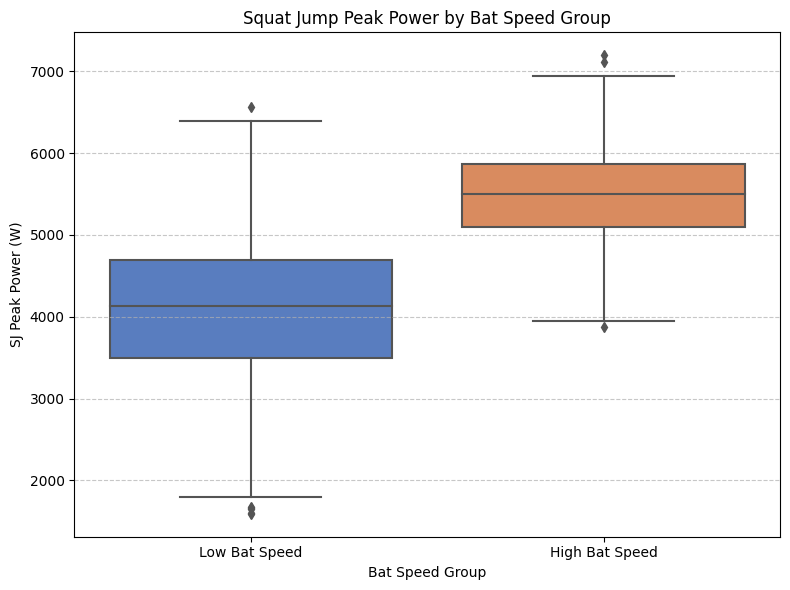

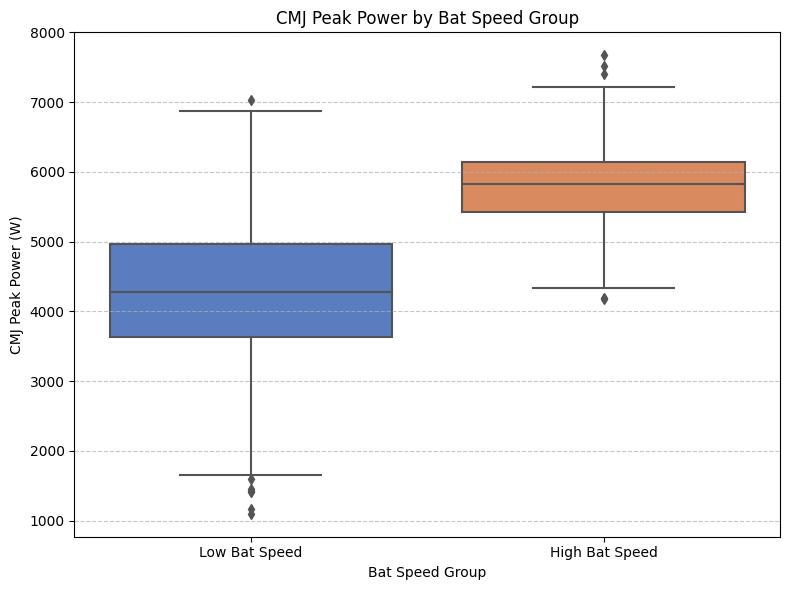

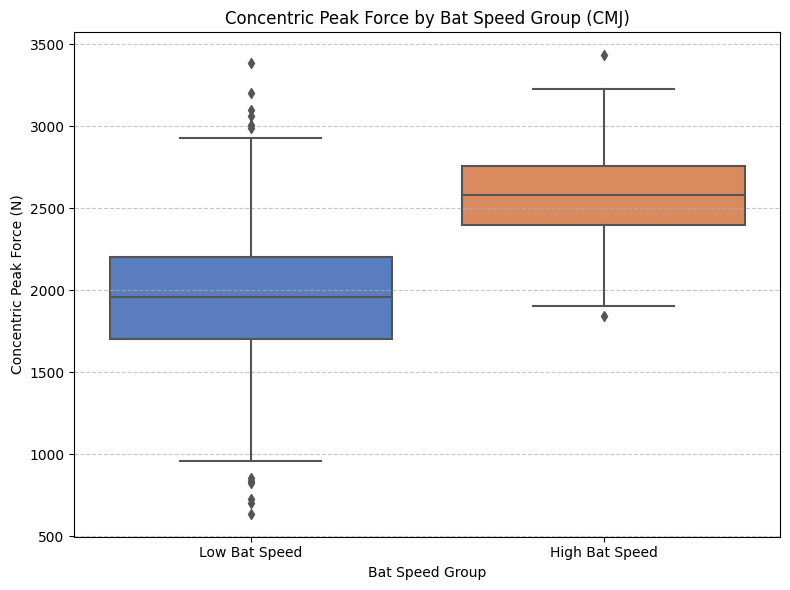

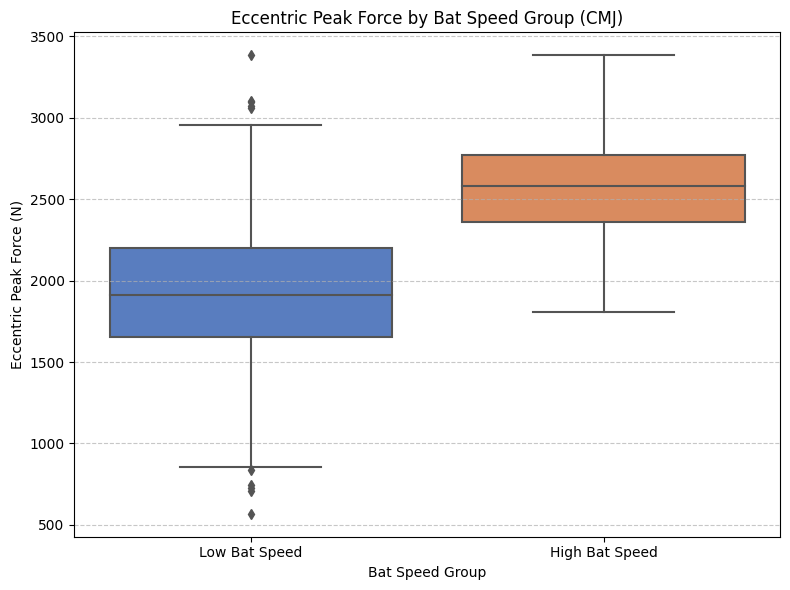

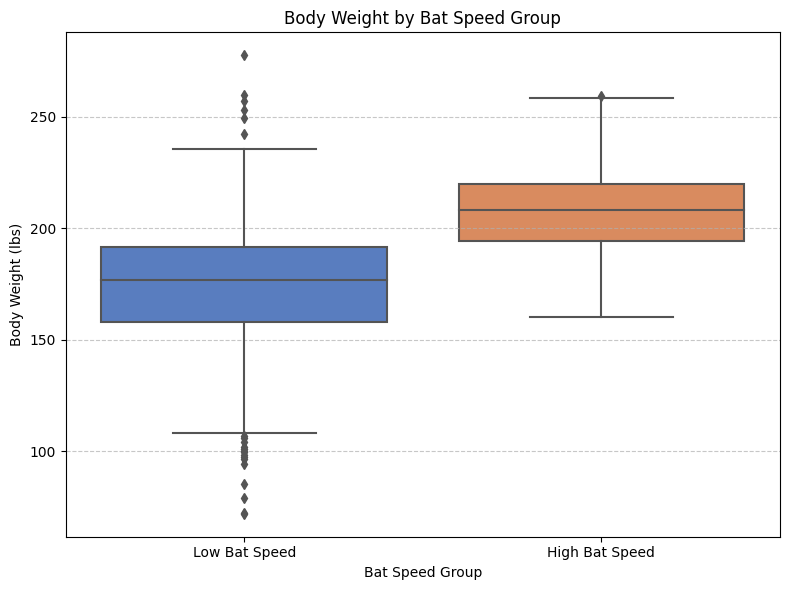

In [45]:
# Filter data based on bat speed and exclude rows without bat speed
filtered_data = data[(data['bat_speed_mph'] > 70) | (data['bat_speed_mph'] < 68)].dropna(subset=['bat_speed_mph'])

# Identify numeric columns
numeric_columns = filtered_data.select_dtypes(include=[np.number]).columns.tolist()

# Separate the two bat speed groups
high_speed_group = filtered_data[filtered_data['bat_speed_mph'] > 70]
low_speed_group = filtered_data[filtered_data['bat_speed_mph'] < 68]

# Perform t-tests for numeric columns (excluding 'bat_speed_mph')
results = [
    {
        'Variable': column,
        'P-Value': ttest_ind(high_speed_group[column], low_speed_group[column], nan_policy='omit')[1]
    }
    for column in numeric_columns if column != 'bat_speed_mph'
]

# Convert results to a DataFrame and sort by p-value
results_df = pd.DataFrame(results).sort_values(by='P-Value')

# Select the top 5 variables with the smallest p-values
top_5_variables = results_df.head(5)['Variable']

# Add Bat Speed Group column
filtered_data['Bat Speed Group'] = np.where(filtered_data['bat_speed_mph'] > 70, 'High Bat Speed', 'Low Bat Speed')

# Create a function to generate boxplots
def plot_boxplot(data, y, title, ylabel):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Bat Speed Group', y=y, data=data, palette="muted")
    plt.title(title)
    plt.xlabel("Bat Speed Group")
    plt.ylabel(ylabel)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot top 5 variables
plot_params = [
    ('peak_power_[w]_mean_sj', "Squat Jump Peak Power by Bat Speed Group", "SJ Peak Power (W)"),
    ('peak_power_[w]_mean_cmj', "CMJ Peak Power by Bat Speed Group", "CMJ Peak Power (W)"),
    ('concentric_peak_force_[n]_mean_cmj', "Concentric Peak Force by Bat Speed Group (CMJ)", "Concentric Peak Force (N)"),
    ('eccentric_peak_force_[n]_mean_cmj', "Eccentric Peak Force by Bat Speed Group (CMJ)", "Eccentric Peak Force (N)"),
    ('body_weight_[lbs]', "Body Weight by Bat Speed Group", "Body Weight (lbs)")
]

# Generate all boxplots using the function
for y, title, ylabel in plot_params:
    plot_boxplot(filtered_data, y, title, ylabel)


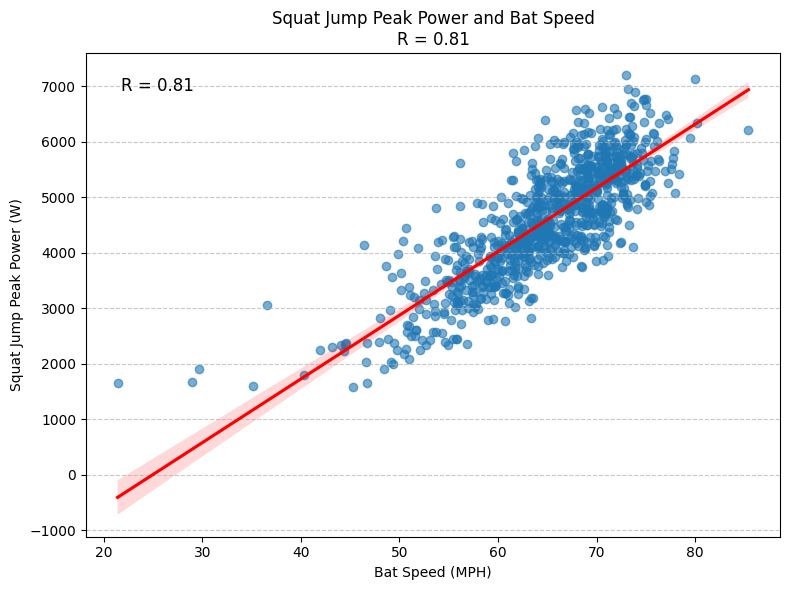

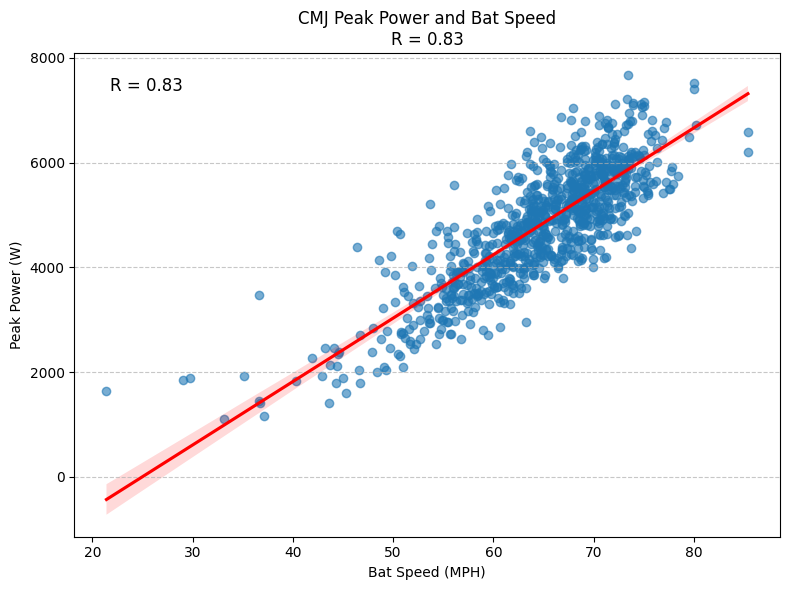

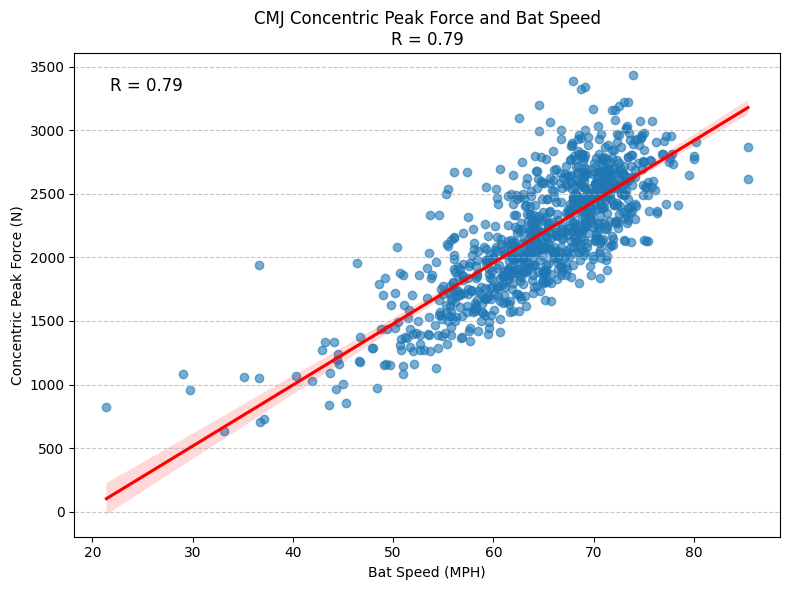

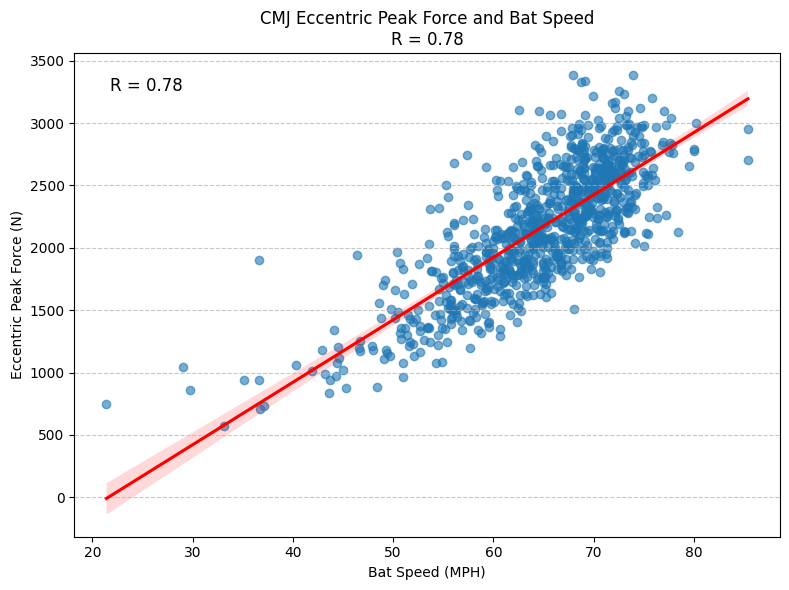

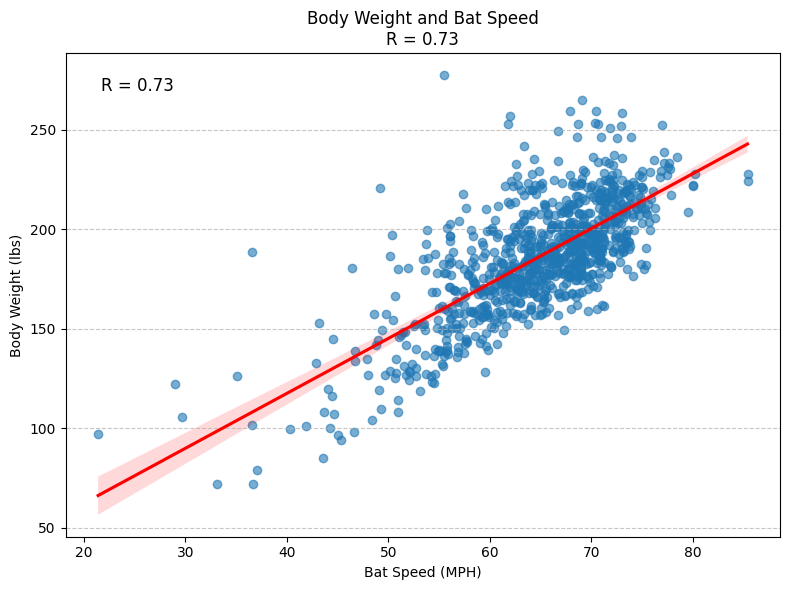

In [46]:
# Variables to plot
variables = [
    ('peak_power_[w]_mean_sj', "Squat Jump Peak Power and Bat Speed", "Squat Jump Peak Power (W)"),
    ('peak_power_[w]_mean_cmj', "CMJ Peak Power and Bat Speed", "Peak Power (W)"),
    ('concentric_peak_force_[n]_mean_cmj', "CMJ Concentric Peak Force and Bat Speed", "Concentric Peak Force (N)"),
    ('eccentric_peak_force_[n]_mean_cmj', "CMJ Eccentric Peak Force and Bat Speed", "Eccentric Peak Force (N)"),
    ('body_weight_[lbs]', "Body Weight and Bat Speed", "Body Weight (lbs)")
]

# Including all data points
for variable, title, ylabel in variables:
    data_for_corr = data[[variable, 'bat_speed_mph']].dropna()

    # Pearson correlation calculation
    r_value = pearsonr(data_for_corr[variable], data_for_corr['bat_speed_mph'])[0] if data_for_corr[variable].nunique() > 1 else float('nan')

    # Plotting
    plt.figure(figsize=(8, 6))
    sns.regplot(
        x='bat_speed_mph',
        y=variable,
        data=data_for_corr,
        scatter_kws={'alpha': 0.6},
        line_kws={'color': 'red'}
    )
    
    # Title and labels
    xlabel = "Bat Speed (MPH)"
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Display R value on the plot
    if not pd.isna(r_value):
        plt.title(f"{title}\nR = {r_value:.2f}")
        plt.text(0.05, 0.95, f"R = {r_value:.2f}", transform=plt.gca().transAxes,
                 fontsize=12, color='black', verticalalignment='top', horizontalalignment='left')
    else:
        plt.title(f"{title}\nR = NaN (Constant or Missing Data)")

    # Grid and layout adjustments
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()
